In [51]:
import pandas as pd
import numpy as np#categarial and missing problem &linearly seperable data for logistic regression

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
df=pd.read_csv('titanic_train.csv')

In [54]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
df=df.drop('PassengerId',axis=1)

In [56]:
df.drop(['Name','Ticket'],inplace=True,axis=1)

In [57]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [58]:
df.isnull()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False


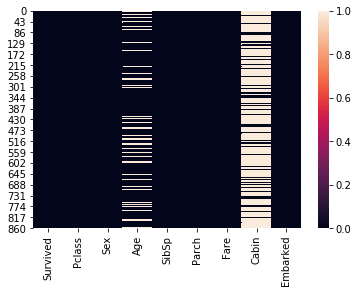

In [59]:
sns.heatmap(df.isnull())#dark=false, white=True

In [60]:
df.drop('Cabin',axis=1,inplace=True)

In [61]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


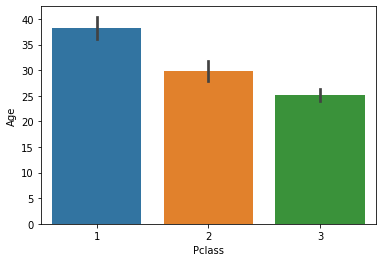

In [62]:
sns.barplot(x='Pclass',y='Age',data=df)

In [63]:
df.groupby('Pclass').mean()['Age'] #conditional mean calculation 

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [64]:
def impute_age(var):#var is nothing but list of ['Pclass','Age']
    p=var[0]#plcass
    a=var[1]#age
    
    if pd.isnull(a):
        if p==1:
            return 38
        elif p==2:
            return 30
        else:
            return 25
        
    else:
        return a #if age is present not filling this coloumn.

In [65]:
df['Age']=df[['Pclass','Age']].apply(impute_age,axis=1)# we pass the list then axis=1.

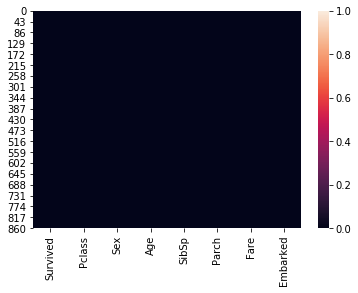

In [66]:
sns.heatmap(df.isnull())

In [67]:
sex=pd.get_dummies(df['Sex'],drop_first=True) #data converted into 0 & 1

In [68]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [69]:
embarked=pd.get_dummies(df['Embarked'], drop_first=True) #droping column 

In [70]:
df=pd.concat([df,sex,embarked],axis=1)

In [71]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [72]:
df.drop(['Sex','Embarked'],axis=1,inplace=True)

In [73]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
ss=StandardScaler()

In [76]:
scaled_array=ss.fit_transform(df.drop('Survived',axis=1))

In [77]:
scaled_array

array([[ 0.82737724, -0.55018473,  0.43279337, ...,  0.73769513,
        -0.30756234,  0.61930636],
       [-1.56610693,  0.66149881,  0.43279337, ..., -1.35557354,
        -0.30756234, -1.61470971],
       [ 0.82737724, -0.24726385, -0.4745452 , ..., -1.35557354,
        -0.30756234,  0.61930636],
       ...,
       [ 0.82737724, -0.32299407,  0.43279337, ..., -1.35557354,
        -0.30756234,  0.61930636],
       [-1.56610693, -0.24726385, -0.4745452 , ...,  0.73769513,
        -0.30756234, -1.61470971],
       [ 0.82737724,  0.20711748, -0.4745452 , ...,  0.73769513,
         3.25137334, -1.61470971]])

In [78]:
scaled_array.shape

(891, 8)

In [79]:
x=pd.DataFrame(data=scaled_array,columns=df.columns[1:])

In [80]:
x

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0.827377,-0.550185,0.432793,-0.473674,-0.502445,0.737695,-0.307562,0.619306
1,-1.566107,0.661499,0.432793,-0.473674,0.786845,-1.355574,-0.307562,-1.614710
2,0.827377,-0.247264,-0.474545,-0.473674,-0.488854,-1.355574,-0.307562,0.619306
3,-1.566107,0.434308,0.432793,-0.473674,0.420730,-1.355574,-0.307562,0.619306
4,0.827377,0.434308,-0.474545,-0.473674,-0.486337,0.737695,-0.307562,0.619306
...,...,...,...,...,...,...,...,...
886,-0.369365,-0.171534,-0.474545,-0.473674,-0.386671,0.737695,-0.307562,0.619306
887,-1.566107,-0.777375,-0.474545,-0.473674,-0.044381,-1.355574,-0.307562,0.619306
888,0.827377,-0.322994,0.432793,2.008933,-0.176263,-1.355574,-0.307562,0.619306
889,-1.566107,-0.247264,-0.474545,-0.473674,-0.044381,0.737695,-0.307562,-1.614710


In [81]:
y=df['Survived']

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [84]:
x_train.shape

(623, 8)

In [85]:
y_train.shape

(623,)

In [86]:
x_test.shape

(268, 8)

In [87]:
y_test.shape

(268,)

In [88]:
from sklearn.linear_model import LogisticRegression# its classicication

In [89]:
lr=LogisticRegression()

In [90]:
lr.fit(x_train,y_train)

/Users/sandip/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
lr.coef_

array([[-0.94496211, -0.52783178, -0.41977196, -0.14670731,  0.07369111,
        -1.37760806, -0.03087051, -0.2036688 ]])

In [92]:
lr.intercept_

array([-0.67865836])

In [93]:
ypred=lr.predict(x_test)

In [94]:
#for evaluation use confusion matrix

In [95]:
s=lr.score(x_test,y_test)

In [96]:
s

0.7985074626865671

In [97]:
from sklearn.metrics import confusion_matrix

In [98]:
cm=confusion_matrix(y_test,ypred)

In [99]:
cm

array([[138,  22],
       [ 32,  76]])

In [100]:
(133+77)/268

0.7835820895522388

In [107]:
from sklearn.decomposition import PCA

In [108]:
pca=PCA(n_components=1)

In [109]:
x_pca=pca.fit_transform(scaled_array)

In [104]:
x_pca.shape

(891, 2)

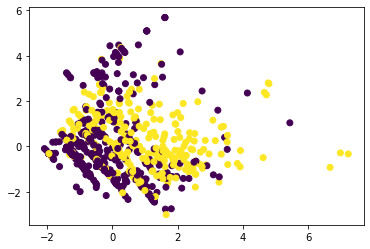

In [105]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=y)

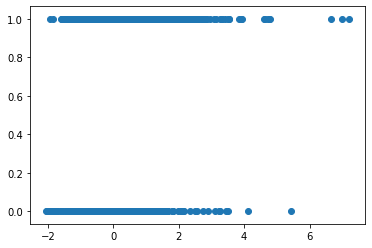

In [110]:
plt.scatter(x_pca,y)